In [1]:
from openai import OpenAI
import mysql.connector as connection
import pandas as pd
import warnings
from datetime import datetime
import os
import pyodbc
import warnings
import requests
from IPython.display import Audio

from func_MySQL_DB import *
from func_ChatGPT import *
from func_visualizations import *
import config 

# забираем параметры подключения к БД
server = config.server
port = config.port
database = config.database
login = config.login
passw = config.password

In [2]:
user_question = "Какие расходы без ндс по возрастным группам?"

In [3]:
sql_answer = get_sql_chain(user_question).replace('\n', ' ')

In [4]:
sql_answer

'SELECT age, SUM(costs_without_nds) AS total_costs_without_nds FROM yd_05_01_main_without_conv GROUP BY age;'

In [5]:
df = get_dataframe(server, database, login, passw, sql_answer, port)

Connection success


D:\00_Downloads\01_jupyter_test_files\36_01_mysql_to_chatGPT\func_MySQL_DB.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:
df.columns

Index(['age', 'total_costs_without_nds'], dtype='object')

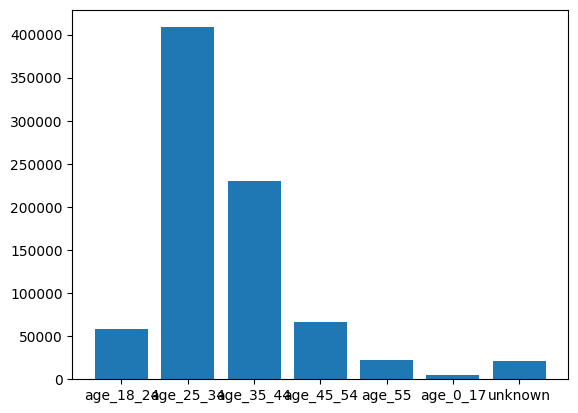

In [8]:
get_visual_bar(df, 'age', 'total_costs_without_nds')

In [ ]:
user_question = "Какие расходы без ндс были за весь период?Напиши цифры прописью"

In [ ]:
gpt_answer = get_db_answer(user_question)

In [ ]:
gpt_answer

In [ ]:
file_path = os.path.join(os.getcwd(), "speech.mp3")

In [ ]:
get_voice_gpt(gpt_answer, file_path)

In [ ]:
# play audio
Audio(file_path, autoplay=False)

In [ ]:
dialog_list = []

In [ ]:
prompt = "привет! как дела?"

In [ ]:
get_simple_chat(dialog_list, prompt, model='gpt-3.5-turbo')

In [ ]:
dialog_list